In [1]:
import pandas as pd
import numpy as np
import time
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score
import warnings
warnings.filterwarnings("ignore")

# Load data ekspor
file_path = '../dataset/data ekspor1.xlsx'
df = pd.read_excel(file_path)

# Cek dan bersihkan data: gunakan hanya kolom numerik
df_numeric = df.select_dtypes(include=[np.number]).dropna()

# Normalisasi
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_numeric)

# Simpan hasil evaluasi
results = []

# Eksperimen dengan cluster dari 2 hingga 7
for k in range(2, 8):
    start_time = time.time()

    kmeans = KMeans(n_clusters=k, random_state=42, n_init='auto')
    labels = kmeans.fit_predict(X_scaled)

    silhouette = round(silhouette_score(X_scaled, labels), 2)
    dbi = round(davies_bouldin_score(X_scaled, labels), 2)
    exec_time = round(time.time() - start_time, 4)

    results.append({
        'Algorithm': 'K-Means',
        'Clusters Num.': k,
        'Avg. Silhouette': silhouette,
        'Davies Bouldin Index': dbi,
        'Execution Time (s)': exec_time
    })

#hasil dalam bentuk tabel
results_df = pd.DataFrame(results)
print(results_df.to_string(index=False))


Algorithm  Clusters Num.  Avg. Silhouette  Davies Bouldin Index  Execution Time (s)
  K-Means              2             0.80                  0.12              0.1934
  K-Means              3             0.62                  0.45              0.0068
  K-Means              4             0.48                  0.73              0.0085
  K-Means              5             0.40                  0.86              0.0085
  K-Means              6             0.35                  0.79              0.0091
  K-Means              7             0.37                  0.77              0.0097


In [ ]:
import pandas as pd
import numpy as np
import time
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score, davies_bouldin_score
import warnings
warnings.filterwarnings("ignore")

# Load data ekspor
file_path = '../dataset/data ekspor1.xlsx'
df = pd.read_excel(file_path)

# Seleksi kolom numerik dan drop nilai NaN
df_numeric = df.select_dtypes(include=[np.number]).dropna()

# Normalisasi data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_numeric)

# Simpan hasil evaluasi
results = []

# Eksperimen Agglomerative Clustering untuk k = 2 sampai 7
for k in range(2, 8):
    start_time = time.time()

    agglo = AgglomerativeClustering(n_clusters=k)
    labels = agglo.fit_predict(X_scaled)

    silhouette = round(silhouette_score(X_scaled, labels), 2)
    dbi = round(davies_bouldin_score(X_scaled, labels), 2)
    exec_time = round(time.time() - start_time, 4)

    results.append({
        'Algorithm': 'Agglomerative',
        'Clusters Num.': k,
        'Avg. Silhouette': silhouette,
        'Davies Bouldin Index': dbi,
        'Execution Time (s)': exec_time
    })

results_df = pd.DataFrame(results)
print(results_df.to_string(index=False))


    Algorithm  Clusters Num.  Avg. Silhouette  Davies Bouldin Index  Execution Time (s)
Agglomerative              2             0.84                  0.10              0.0191
Agglomerative              3             0.59                  0.58              0.0032
Agglomerative              4             0.59                  0.61              0.0041
Agglomerative              5             0.54                  0.82              0.0044
Agglomerative              6             0.55                  0.68              0.0040
Agglomerative              7             0.54                  0.62              0.0048


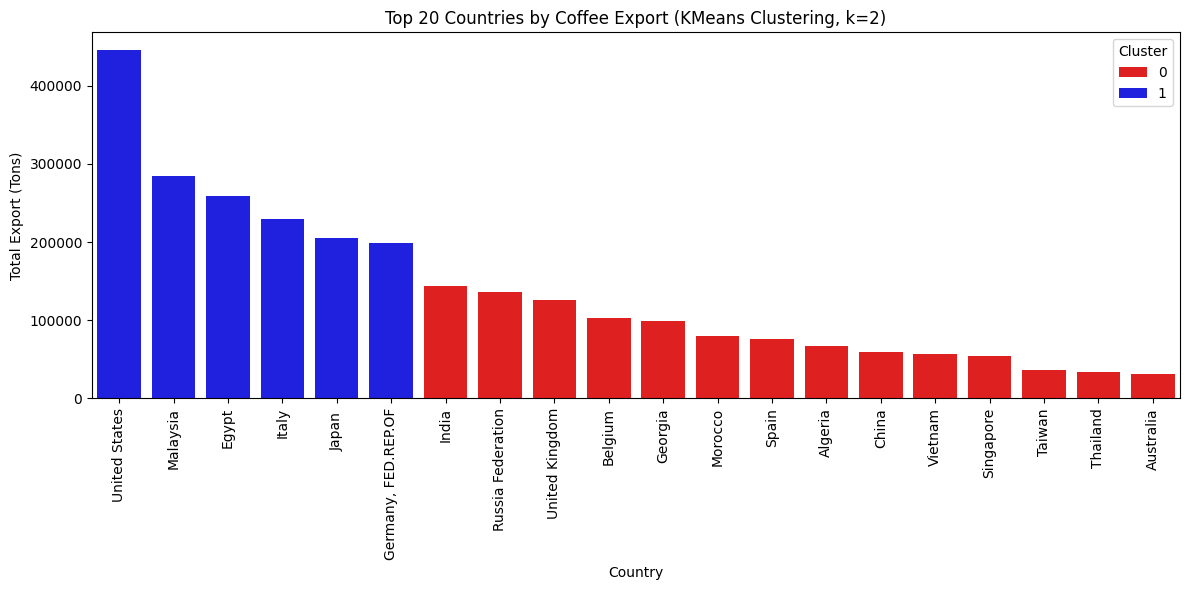

In [ ]:
# Langkah 1: Install dan import library
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

# Langkah 2: Upload file
#uploaded = files.upload()  # Pilih file: data ekspor.xlsx
#file_path = list(uploaded.keys())[0]


# Langkah 3: Baca file
df = pd.read_excel("../dataset/data ekspor1.xlsx", sheet_name='Sheet1')

# Langkah 4: Identifikasi kolom berat ekspor
berat_cols = [col for col in df.columns if "Berat" in col and "Ton" in col]

# Langkah 5: Hitung total ekspor per negara
df['Total_Ekspor'] = df[berat_cols].sum(axis=1)
df_berat = df[['Negara Tujuan', 'Total_Ekspor']].copy()

# Langkah 6: Clustering dengan KMeans (k=2 dan k=3)
kmeans2 = KMeans(n_clusters=2, random_state=42)
df_berat['Cluster_2'] = kmeans2.fit_predict(df_berat[['Total_Ekspor']])

#kmeans3 = KMeans(n_clusters=3, random_state=42)
#df_berat['Cluster_3'] = kmeans3.fit_predict(df_berat[['Total_Ekspor']])

# Langkah 7: Ambil 20 negara dengan ekspor tertinggi
top20 = df_berat.sort_values('Total_Ekspor', ascending=False).head(20)

# Langkah 8a: Visualisasi Cluster (k=2)
plt.figure(figsize=(12, 6))
sns.barplot(
    data=top20,
    x='Negara Tujuan',
    y='Total_Ekspor',
    hue='Cluster_2',
    palette={0: 'red', 1: 'blue'}
)
plt.title("Top 20 Countries by Coffee Export (KMeans Clustering, k=2)")
plt.xlabel("Country")
plt.ylabel("Total Export (Tons)")
plt.xticks(rotation=90)
plt.legend(title="Cluster")
plt.tight_layout()
plt.show()

# Langkah 8b: Visualisasi Cluster (k=3)
#plt.figure(figsize=(12, 6))
#sns.barplot(
    #data=top20,
    #x='Negara Tujuan',
    #y='Total_Ekspor',
    #hue='Cluster_3',
    #palette='Set1'
#)
#plt.title("Top 20 Countries by Coffee Export (KMeans Clustering, k=3)")
#plt.xlabel("Country")
#plt.ylabel("Total Export (Tons)")
#plt.xticks(rotation=90)
#plt.legend(title="Cluster")
#plt.tight_layout()
#plt.show()


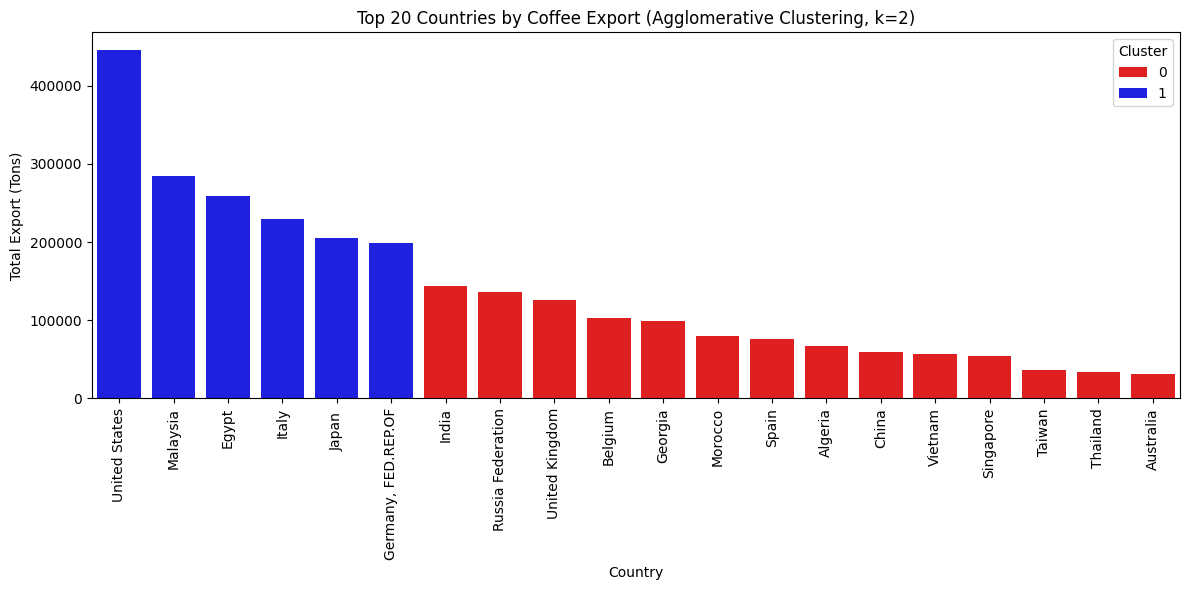

In [ ]:
# Langkah 1: Import library
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import AgglomerativeClustering

# Langkah 2: Baca file ekspor
df = pd.read_excel("../dataset/data ekspor1.xlsx", sheet_name='Sheet1')

# Langkah 3: Identifikasi kolom berat ekspor
berat_cols = [col for col in df.columns if "Berat" in col and "Ton" in col]

# Langkah 4: Hitung total ekspor per negara
df['Total_Ekspor'] = df[berat_cols].sum(axis=1)
df_berat = df[['Negara Tujuan', 'Total_Ekspor']].copy()

# Langkah 5: Clustering dengan Agglomerative Clustering (k=2)
agglo = AgglomerativeClustering(n_clusters=2)
df_berat['Cluster'] = agglo.fit_predict(df_berat[['Total_Ekspor']])

# Langkah 6: Ambil 20 negara dengan ekspor tertinggi
top20 = df_berat.sort_values('Total_Ekspor', ascending=False).head(20)

# Langkah 7: Visualisasi hasil clustering
plt.figure(figsize=(12, 6))
sns.barplot(
    data=top20,
    x='Negara Tujuan',
    y='Total_Ekspor',
    hue='Cluster',
    palette={0: 'red', 1: 'blue'}
)

plt.title("Top 20 Countries by Coffee Export (Agglomerative Clustering, k=2)")
plt.xlabel("Country")
plt.ylabel("Total Export (Tons)")
plt.xticks(rotation=90)
plt.legend(title="Cluster")
plt.tight_layout()
plt.show()


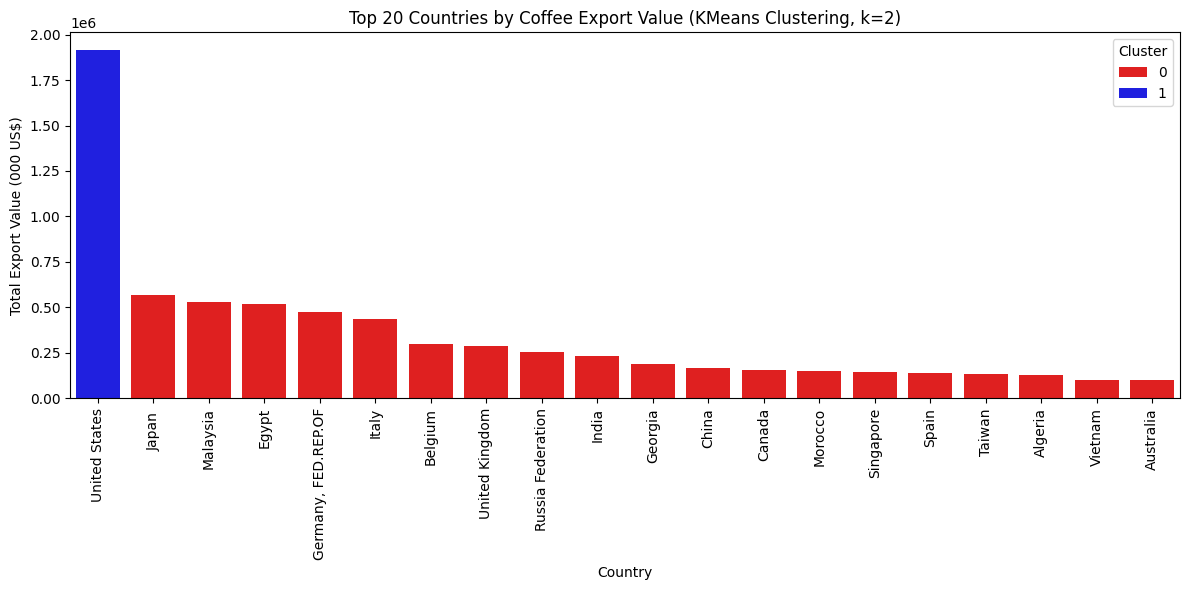

In [ ]:
# Langkah 1: Import library
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

# Langkah 2: Baca file ekspor
df = pd.read_excel("../dataset/data ekspor1.xlsx", sheet_name='Sheet1')

# Langkah 3: Identifikasi kolom nilai ekspor
nilai_cols = [col for col in df.columns if "Value" in col and "(000 US$)" in col]

# Langkah 4: Pastikan kolom nilai numerik dan hitung total nilai ekspor per negara
df[nilai_cols] = df[nilai_cols].apply(pd.to_numeric, errors='coerce').fillna(0)
df['Total_Value'] = df[nilai_cols].sum(axis=1)
df_value = df[['Negara Tujuan', 'Total_Value']].copy()

# Langkah 5: Clustering dengan KMeans (k=2)
kmeans = KMeans(n_clusters=2, random_state=42)
df_value['Cluster'] = kmeans.fit_predict(df_value[['Total_Value']])

# Langkah 6: Ambil 20 negara dengan nilai ekspor tertinggi
top20_value = df_value.sort_values('Total_Value', ascending=False).head(20)

# Langkah 7: Visualisasi
plt.figure(figsize=(12, 6))
sns.barplot(
    data=top20_value,
    x='Negara Tujuan',
    y='Total_Value',
    hue='Cluster',
    palette={0: 'red', 1: 'blue'}
)

plt.title("Top 20 Countries by Coffee Export Value (KMeans Clustering, k=2)")
plt.xlabel("Country")
plt.ylabel("Total Export Value (000 US$)")
plt.xticks(rotation=90)
plt.legend(title="Cluster")
plt.tight_layout()
plt.show()


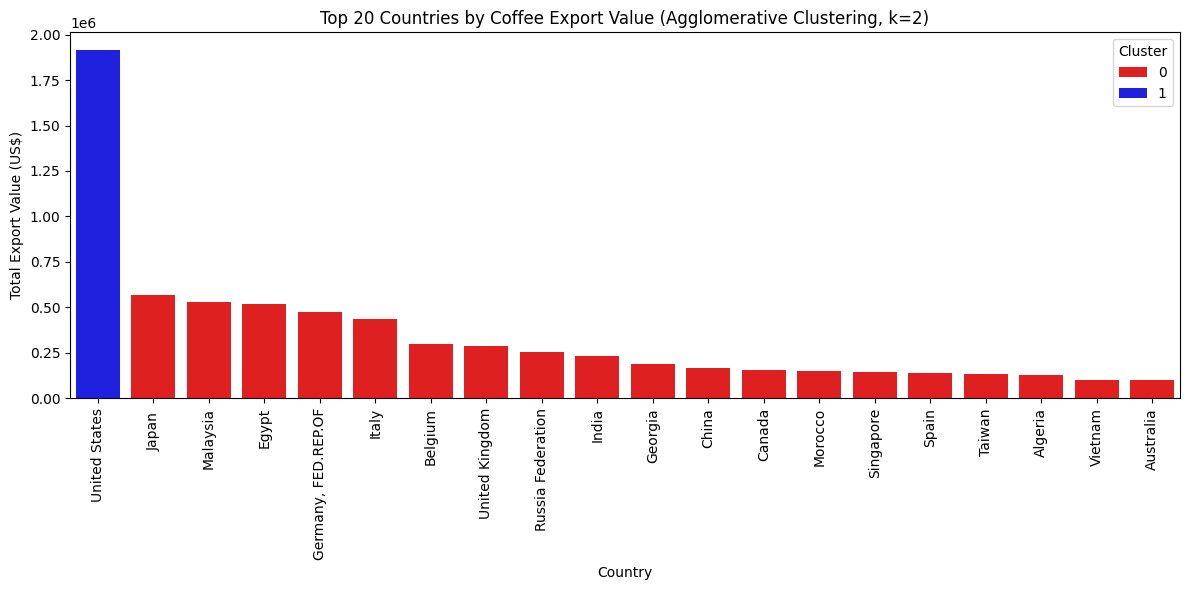

In [ ]:
# Langkah 1: Import library
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import AgglomerativeClustering

# Langkah 2: Baca file ekspor
df = pd.read_excel("../dataset/data ekspor1.xlsx", sheet_name='Sheet1')

# Langkah 3: Identifikasi kolom nilai ekspor
nilai_cols = [col for col in df.columns if "Value" in col and "(000 US$)" in col]

# Langkah 4: Hitung total nilai ekspor per negara
df['Total_Value'] = df[nilai_cols].sum(axis=1)
df_value = df[['Negara Tujuan', 'Total_Value']].copy()

# Langkah 5: Clustering dengan Agglomerative Clustering (k=2)
agglo = AgglomerativeClustering(n_clusters=2)
df_value['Cluster'] = agglo.fit_predict(df_value[['Total_Value']])

# Langkah 6: Ambil 20 negara dengan nilai ekspor tertinggi
top20_value = df_value.sort_values('Total_Value', ascending=False).head(20)

# Langkah 7: Visualisasi
plt.figure(figsize=(12, 6))
sns.barplot(
    data=top20_value,
    x='Negara Tujuan',
    y='Total_Value',
    hue='Cluster',
    palette={0: 'red', 1: 'blue'}
)

plt.title("Top 20 Countries by Coffee Export Value (Agglomerative Clustering, k=2)")
plt.xlabel("Country")
plt.ylabel("Total Export Value (US$)")
plt.xticks(rotation=90)
plt.legend(title="Cluster")
plt.tight_layout()
plt.show()


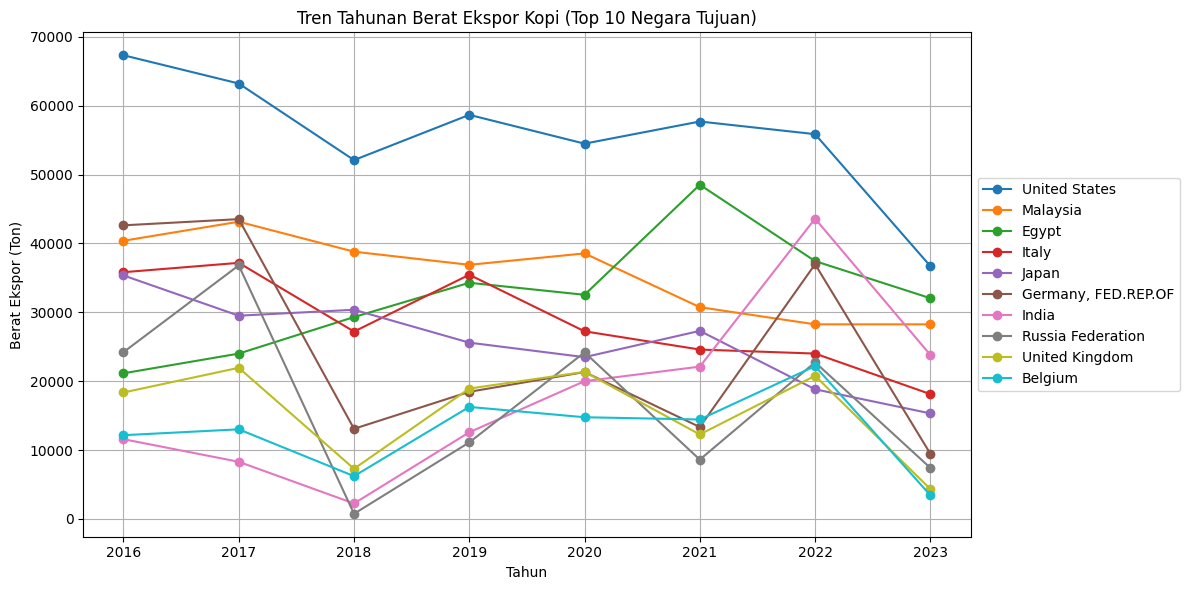

In [9]:
# Langkah 1: Import library
import pandas as pd
import matplotlib.pyplot as plt


df = pd.read_excel("../dataset/data ekspor.xlsx", sheet_name='Sheet1')

# Langkah 3: Identifikasi kolom berat ekspor
berat_cols = [col for col in df.columns if "Berat" in col and "Ton" in col]
tahun = [int(col.split()[-1]) for col in berat_cols]

# Langkah 4: Hitung total berat ekspor dan pilih 10 negara teratas
df['Total_Berat'] = df[berat_cols].sum(axis=1)
top10_negara = df.sort_values('Total_Berat', ascending=False).head(10)

# Langkah 5: Plot grafik tren berat ekspor
plt.figure(figsize=(12, 6))
for _, row in top10_negara.iterrows():
    negara = row['Negara Tujuan']
    plt.plot(
        tahun,
        row[berat_cols].values,
        marker='o',
        label=negara
    )

plt.title("Tren Tahunan Berat Ekspor Kopi (Top 10 Negara Tujuan)")
plt.xlabel("Tahun")
plt.ylabel("Berat Ekspor (Ton)")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.grid(True)
plt.tight_layout()
plt.show()


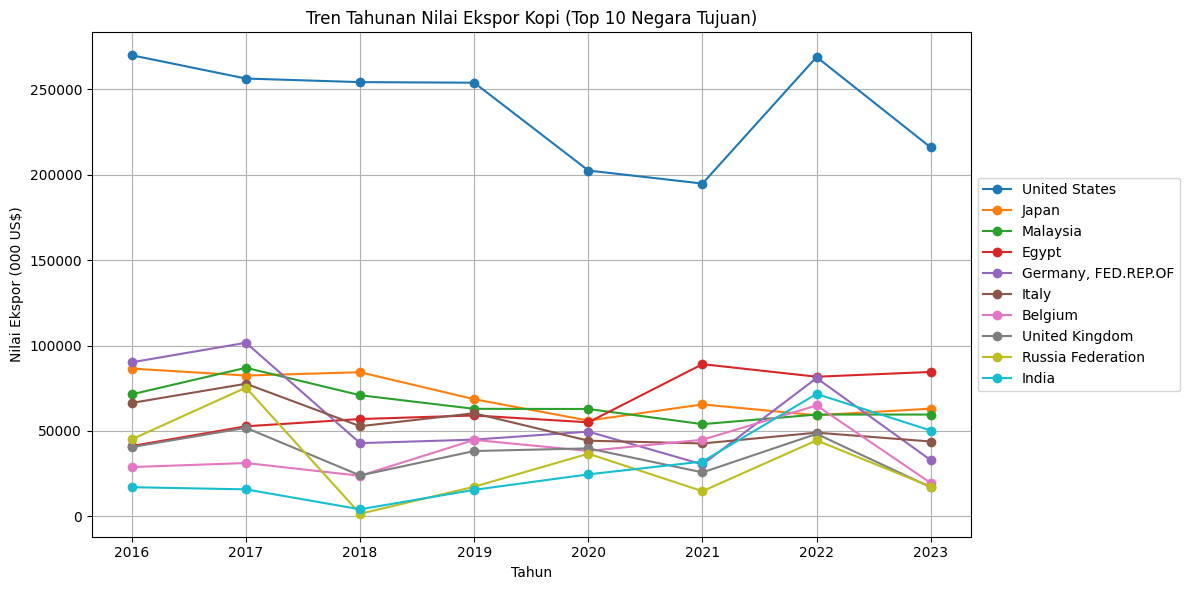

In [10]:
# Langkah 1: Import library
import pandas as pd
import matplotlib.pyplot as plt


df = pd.read_excel("../dataset/data ekspor.xlsx", sheet_name='Sheet1')

# Langkah 3: Identifikasi kolom nilai ekspor (US$)
value_cols = [col for col in df.columns if "Value" in col and "(000 US$)" in col]
tahun = [int(col.split()[-1]) for col in value_cols]

# Langkah 4: Pastikan data numerik dan hitung total nilai ekspor
df[value_cols] = df[value_cols].apply(pd.to_numeric, errors='coerce').fillna(0)
df['Total_Value'] = df[value_cols].sum(axis=1)

# Pilih 10 negara dengan nilai ekspor tertinggi
top10_value = df.sort_values('Total_Value', ascending=False).head(10)

# Langkah 5: Plot grafik tren nilai ekspor
plt.figure(figsize=(12, 6))
for _, row in top10_value.iterrows():
    negara = row['Negara Tujuan']
    plt.plot(
        tahun,
        row[value_cols].values,
        marker='o',
        label=negara
    )

plt.title("Tren Tahunan Nilai Ekspor Kopi (Top 10 Negara Tujuan)")
plt.xlabel("Tahun")
plt.ylabel("Nilai Ekspor (000 US$)")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.grid(True)
plt.tight_layout()
plt.show()


In [1]:
import pandas as pd
import folium
from sklearn.cluster import KMeans

# Baca dataset ekspor
df = pd.read_excel("../dataset/data ekspor1.xlsx", sheet_name='Sheet1')

# Identifikasi kolom berat ekspor
berat_cols = [col for col in df.columns if "Berat" in col and "Ton" in col]

# Hitung total ekspor per negara
df['Total_Ekspor'] = df[berat_cols].sum(axis=1)

# Filter negara yang memiliki koordinat lengkap
df_map = df.dropna(subset=['Latitude', 'Longitude']).copy()

# Clustering berdasarkan total ekspor
kmeans = KMeans(n_clusters=2, random_state=42)
df_map['Cluster'] = kmeans.fit_predict(df_map[['Total_Ekspor']])

# Buat peta Folium
map_ekspor = folium.Map(location=[0, 110], zoom_start=2, tiles='cartodbpositron')

# Tambahkan marker
for _, row in df_map.iterrows():
    warna = 'red' if row['Cluster'] == 0 else 'blue'
    label = 'Low' if row['Cluster'] == 0 else 'High'
    folium.CircleMarker(
        location=[row['Latitude'], row['Longitude']],
        radius=6,
        color=warna,
        fill=True,
        fill_opacity=0.8,
        popup=folium.Popup(
            f"<b>{row['Negara Tujuan']}</b><br>Cluster: {label}<br>Total Export: {int(row['Total_Ekspor']):,} Ton",
            max_width=300
        )
    ).add_to(map_ekspor)

map_ekspor
